# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

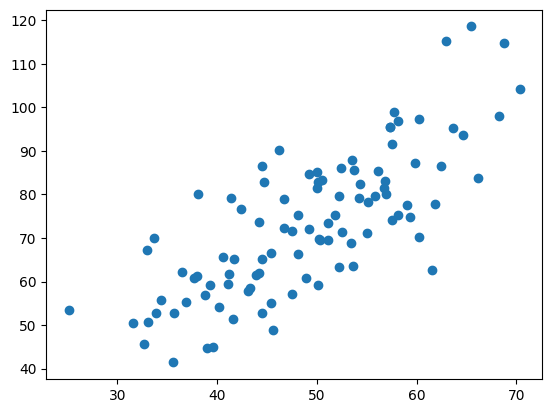

In [9]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [10]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        gradient = (-2*inv_N) * np.dot(X.T, (y-y_hat))
        gradient_norm = np.linalg.norm(gradient)

        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights -= alpha * gradient
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights
    

Now, test your implementation:

In [50]:
alpha = .0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.776579805078
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.3612440799275
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.9294028442378
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141262
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599313
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476233
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926211
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883596
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.426118721056763
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.1905934928502
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.105101264508533
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.599052490481332
Epoch  12  w

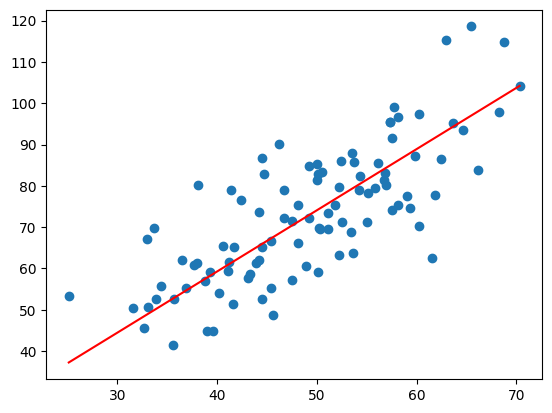

In [12]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

Step 3 is the base case to get out of the loop while Step 5 is the recursive case used to add up the weigths

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.776579805078
Epoch  1  weights:  [[1.46298950e-07]
 [7.42433529e-06]] gradient_norm:  7425.7393556515435
Epoch  2  weights:  [[2.92597171e-07]
 [1.48486334e-05]] gradient_norm:  7425.702131684607
Epoch  3  weights:  [[4.38894662e-07]
 [2.22728942e-05]] gradient_norm:  7425.664907904265
Epoch  4  weights:  [[5.85191424e-07]
 [2.96971178e-05]] gradient_norm:  7425.62768431052
Epoch  5  weights:  [[7.31487455e-07]
 [3.71213043e-05]] gradient_norm:  7425.590460903369
Epoch  6  weights:  [[8.77782757e-07]
 [4.45454535e-05]] gradient_norm:  7425.553237682815
Epoch  7  weights:  [[1.02407733e-06]
 [5.19695654e-05]] gradient_norm:  7425.516014648854
Epoch  8  weights:  [[1.17037117e-06]
 [5.93936402e-05]] gradient_norm:  7425.478791801487
Epoch  9  weights:  [[1.31666428e-06]
 [6.68176778e-05]] gradient_norm:  7425.44156914071
Epoch  10  weights:  [[1.46295667e-06]
 [7.42416781e-05]] gradient_norm:  7425.404346666529
Epoch  11  weights:  [[

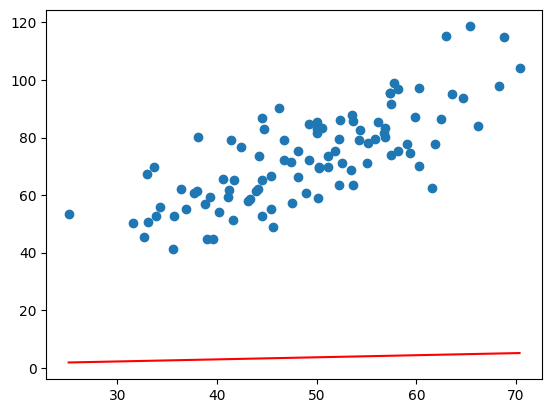

In [46]:
alpha = .000000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, .00001, X, y)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [ ]:

# Your code here

### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.